In [1]:
import sys, os

# make sure the 'code' dir is on your path (change this):
codepath = '/user_data/mmhender/image_stats_gabor/code/'
sys.path.insert(0,codepath)

import numpy as np

from model_fitting import initialize_fitting 
from analyze_fits import analyze_gabor_params
from utils import default_paths
from analyze_features import load_feature_stats

import matplotlib.pyplot as plt
from matplotlib import cm

from plotting import load_fits, plot_utils

In [2]:
# Load everything

models = initialize_fitting.get_prf_models(which_grid=5)
n_prfs = len(models)

which_prf_grid=5;
feature_type='gabor_solo'
subject=999

path_to_load = default_paths.gabor_texture_feat_path
path_to_load = os.path.join(path_to_load, 'feature_stats')

fn1 = os.path.join(path_to_load, 'S%d_%s_mean_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn2 = os.path.join(path_to_load, 'S%d_%s_var_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn3 = os.path.join(path_to_load, 'S%d_%s_covar_grid%d.npy'%(subject, feature_type, which_prf_grid))

mean = np.load(fn1,allow_pickle=True)
var = np.load(fn2,allow_pickle=True)
covar = np.load(fn3,allow_pickle=True)

fn1 = os.path.join(path_to_load, 'S%d_%s_semantic_corrs_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn2 = os.path.join(path_to_load, 'S%d_%s_semantic_discrim_tstat_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn3 = os.path.join(path_to_load, 'S%d_%s_nsamp_grid%d.npy'%(subject, feature_type, which_prf_grid))

corr = np.load(fn1,allow_pickle=True) * (-1)
discrim = np.load(fn2,allow_pickle=True) * (-1)
nsamp = np.load(fn3,allow_pickle=True)

fn1 = os.path.join(path_to_load, 'S%d_%s_semantic_partial_corrs_grid%d.npy'%(subject, feature_type, which_prf_grid))
fn2 = os.path.join(path_to_load, 'S%d_%s_nsamp_partial_corrs_grid%d.npy'%(subject, feature_type, which_prf_grid))

partial_corr = np.load(fn1,allow_pickle=True) * (-1)
partial_nsamp = np.load(fn2,allow_pickle=True)

In [3]:
save_name_groups = os.path.join(default_paths.stim_labels_root,'Highlevel_concat_labelgroupnames.npy')
groups = np.load(save_name_groups, allow_pickle=True).item()
discrim_type_list = groups['discrim_type_list']
split_names = discrim_type_list[0].split('-')
discrim_type_list = ['%s vs not'%split_names[0], '%s vs not'%split_names[1]] + discrim_type_list[1:]

signed_names = discrim_type_list; partial_signed_names = discrim_type_list

In [4]:
discrim_type_list

['face vs not',
 'building vs not',
 'animate-inanimate',
 'small-large',
 'indoor-outdoor']

In [6]:
# mean, var, _ = \
#         load_feature_stats.load_feature_stats(feature_type, subject=subject)

# partial_corr, partial_nsamp, partial_names, partial_signed_names = \
#         load_feature_stats.load_feature_semantic_partial_corrs(feature_type, subject=subject,\
#                                                        min_samp=20, verbose=True, \
#                                                      which_axes_negate = [0,1,2,3,4])
# corr, discrim, nsamp, names, signed_names = \
#         load_feature_stats.load_feature_semantic_corrs(feature_type, subject=subject, \
#                                                        which_axes_negate = [0,1,2,3,4], \
#                                                        min_samp=5, verbose=True)

# split_names = signed_names[0].split(' > ')
# signed_names = ['%s vs not'%split_names[0], '%s vs not'%split_names[1]] + signed_names[1:]
# partial_signed_names = signed_names

In [5]:
# Gather information about the gabor feature channels
sf_unique, ori_unique = analyze_gabor_params.get_gabor_feature_info(n_ori=12, n_sf=8)
n_sf = len(sf_unique)
n_ori = len(ori_unique)

mean_reshaped = np.reshape(mean, [n_ori, n_sf, n_prfs], order = 'F')
var_reshaped = np.reshape(var, [n_ori, n_sf, n_prfs], order = 'F')
 
partial_corr_reshaped = np.reshape(partial_corr, [n_ori, n_sf, n_prfs, len(partial_signed_names)], order='F')
corr_reshaped = np.reshape(corr, [n_ori, n_sf, n_prfs, len(signed_names)], order='F')



In [12]:
corr.shape

(96, 1456, 5)

#### Plot partial correlations, overlaying different semantic axes

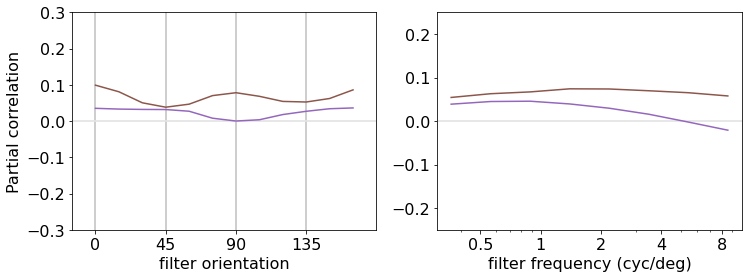

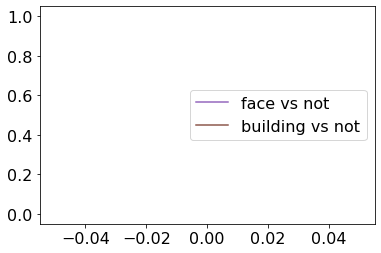

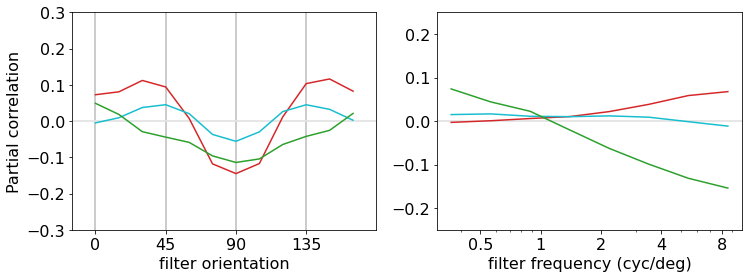

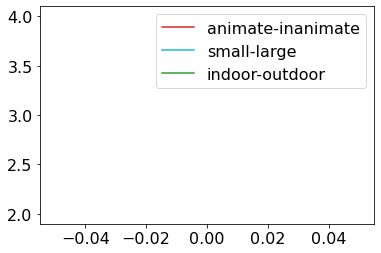

In [8]:
# colors = cm.tab10(np.linspace(0,1,10))[[3,9,2],:]
colors = cm.tab10(np.linspace(0,1,10))[[4,5,3,9,2],:]

plot_utils.set_all_font_sizes(16)

plt.rcParams['pdf.fonttype']=42

for axes_plot in [[0,1],[2,3,4]]:

    plt.figure(figsize=(12,4));

    for ai in axes_plot:
       
        plt.subplot(1,2,1)
        mean_each_orient = np.mean(partial_corr_reshaped[:,:,:,ai], axis=1);
        # meanvals = np.mean(mean_each_orient, axis=1)
        # stdvals = np.std(mean_each_orient, axis=1)
        meanvals = np.nanmean(mean_each_orient, axis=1)
        stdvals = np.nanstd(mean_each_orient, axis=1)

        plt.plot(ori_unique, meanvals, color=colors[ai,:], zorder=10)

        # plt.fill_between(ori_unique, meanvals-stdvals, meanvals+stdvals,
        #         alpha=0.2, edgecolor=colors[ai,:], facecolor=colors[ai,:], zorder=10)


        plt.xlabel('filter orientation');
        plt.xlim([-15, 180])
        for ii in np.arange(0,180,45):
            plt.axvline(ii, color=[0.8, 0.8, 0.8])
        plt.xticks(np.arange(0,180,45))
        plt.axhline(0, color=[0.9, 0.9, 0.9])
        plt.ylabel('Partial correlation')
        plt.ylim([-0.30, 0.30])

        ax = plt.subplot(1,2,2)
        mean_each_sf = np.mean(partial_corr_reshaped[:,:,:,ai], axis=0);
        # meanvals = np.mean(mean_each_sf, axis=1)
        # stdvals = np.std(mean_each_sf, axis=1)
        meanvals = np.nanmean(mean_each_sf, axis=1)
        stdvals = np.nanstd(mean_each_sf, axis=1)

        plt.plot(sf_unique, meanvals, color=colors[ai,:], zorder=10)

        # plt.fill_between(sf_unique, meanvals-stdvals, meanvals+stdvals,
                # alpha=0.2, edgecolor=colors[ai,:], facecolor=colors[ai,:], zorder=10)

        plt.xlabel('filter frequency (cyc/deg)');
        plt.axhline(0, color=[0.9, 0.9, 0.9]);
        plt.ylim([-0.25, 0.25])
        plt.gca().set_xscale('log')
        plt.xticks([10**np.log10(0.5), 10**np.log10(1), \
                        10**np.log10(2),10**np.log10(4), \
                        10**np.log10(8)],\
                       [0.5,1,2,4,8])

    # plt.legend(lh, partial_signed_names)

    # fn2save = os.path.join(default_paths.fig_path,'Gabor_semantic_corrs.pdf')
    # plt.savefig(fn2save)

    plt.figure();
    for ai in axes_plot:
        plt.plot(0,ai, '-', color=colors[ai,:])

    plt.legend(np.array(partial_signed_names)[axes_plot])

[-0.10531106, 0.14281318]
[-0.025327984, 0.1965733]
[-0.13195007, 0.17227183]
[-0.23924632, 0.14656867]
[-0.28520635, 0.1528216]


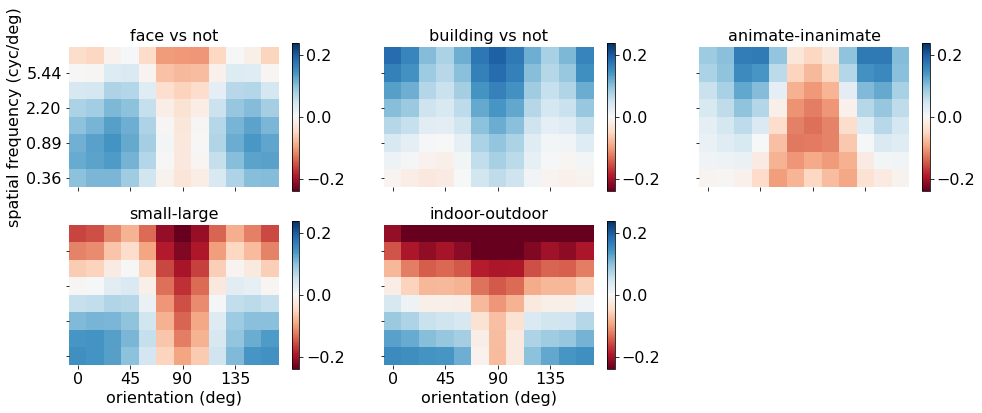

In [30]:
clims = [[-0.24, 0.24] for ai in range(5)];
# clims = [[-0.22, 0.22], [-0.21, 0.21], [-0.07, 0.07]]

plt.figure(figsize=(16,6));
    
for ai in range(len(signed_names)):
    
    plt.subplot(2,3,ai+1)
    
    image = np.mean(corr_reshaped[:,:,:,ai], axis=2)
    print([np.min(image), np.max(image)])
    plt.pcolormesh(image.T, vmin=clims[ai][0], vmax=clims[ai][1], cmap=cm.RdBu)
    # plt.pcolormesh(image.T)
    plt.colorbar()
    if ai>2:
        plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
        plt.xlabel('orientation (deg)')
    else:
        plt.xticks(np.arange(0,12,3)+0.5,[])
    sf_ticks = sf_unique[[0,2,4,6]].round(2)
    if ai==0:
        plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
        plt.ylabel('spatial frequency (cyc/deg)')
    else:
        plt.yticks(np.array([0,2,4,6])+0.5, [])
        
   
    plt.axis('square')
    plt.xlim([0,12])
    plt.ylim([0,8])
    # plt.axis('off')
    
    plt.title(signed_names[ai])
    
    plt.box(False)
    
# fn2save = fn2save = os.path.join(default_paths.fig_path,'Gabor_semantic_corrs_2dplots.pdf')
# plt.savefig(fn2save)


[-0.028372189, 0.06888422]
[0.021116436, 0.10836464]
[-0.17400913, 0.1884865]
[-0.07080511, 0.06453601]
[-0.19467546, 0.13858247]


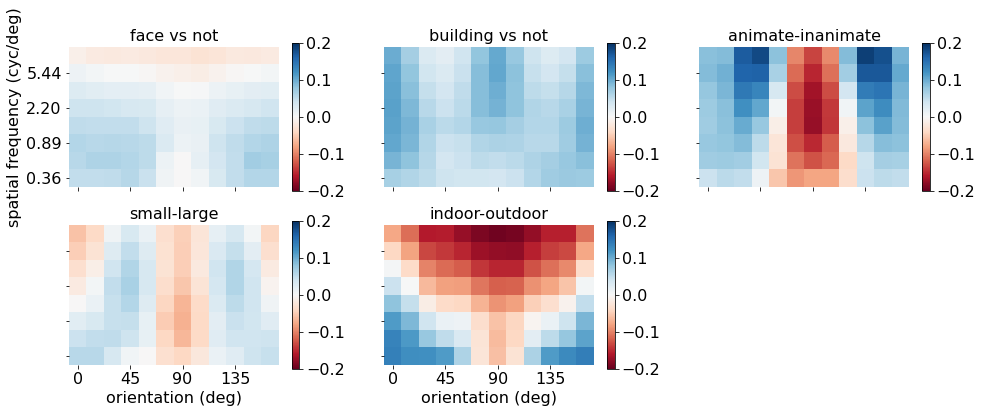

In [9]:
clims = [[-0.2, 0.2] for ai in range(5)];
# clims = [[-0.22, 0.22], [-0.21, 0.21], [-0.07, 0.07]]

plt.figure(figsize=(16,6));
    
for ai, aa in enumerate(partial_signed_names):
    
    plt.subplot(2,3,ai+1)
    
    # image = np.mean(partial_corr_reshaped[:,:,:,ai], axis=2)
    image = np.nanmean(partial_corr_reshaped[:,:,:,ai], axis=2)
    print([np.min(image), np.max(image)])
    plt.pcolormesh(image.T, vmin=clims[ai][0], vmax=clims[ai][1], cmap=cm.RdBu)
    # plt.pcolormesh(image.T)
    plt.colorbar()
    if ai>2:
        plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
        plt.xlabel('orientation (deg)')
    else:
        plt.xticks(np.arange(0,12,3)+0.5,[])
    sf_ticks = sf_unique[[0,2,4,6]].round(2)
    if ai==0:
        plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
        plt.ylabel('spatial frequency (cyc/deg)')
    else:
        plt.yticks(np.array([0,2,4,6])+0.5, [])
        
   
    plt.axis('square')
    plt.xlim([0,12])
    plt.ylim([0,8])
    # plt.axis('off')
    
    
    plt.title(partial_signed_names[ai])
    
    plt.box(False)
    
# fn2save = fn2save = os.path.join(default_paths.fig_path,'Gabor_semantic_corrs_2dplots.pdf')
# plt.savefig(fn2save)


In [48]:
s = models[:,2].round(2)
e = np.sqrt(models[:,0]**2+models[:,1]**2).round(2)

sizes = np.unique(s)
eccens = np.unique(e)

size_ind_max = 4;
ecc_ind_center = 3;
ecc_ind_periph = 6;
center_inds = (s<=sizes[size_ind_max]) & (e<eccens[ecc_ind_center])
periph_inds = (s<=sizes[size_ind_max]) & (e>eccens[ecc_ind_periph])

prf_names = ['central','peripheral']

prf_groups = [center_inds, periph_inds]

# models[center_inds,:].round(2), models[periph_inds,:].round(2)

In [46]:
sizes[size_ind_max], eccens[ecc_ind_center], eccens[ecc_ind_periph]

(0.07, 0.11, 0.34)

In [31]:
partial_corr_reshaped.shape

(12, 8, 1456, 5)

[-0.021658767, 0.049084585]
[-0.012784579, 0.12200411]
[-0.26791945, 0.15528421]
[-0.07516079, 0.08579917]
[-0.16557907, 0.10724763]
[0.00021457933, 0.028307157]
[0.0069109676, 0.094911195]
[-0.13925524, 0.13377182]
[-0.03104175, 0.13014916]
[-0.27399233, 0.07262432]


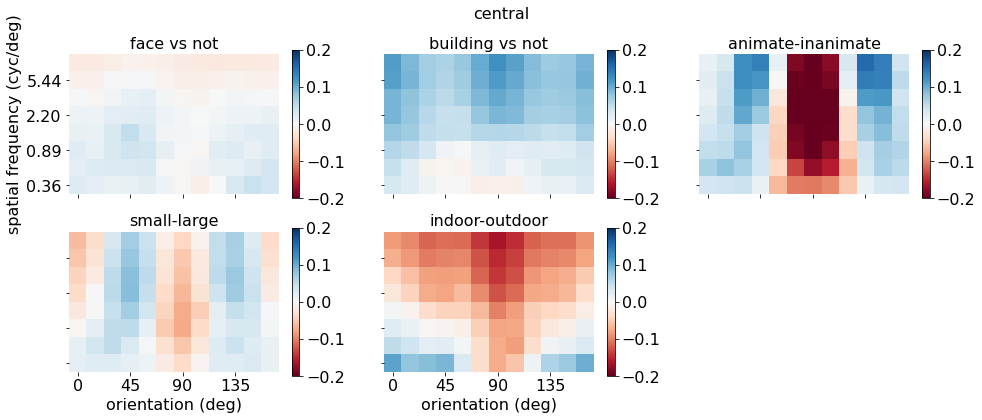

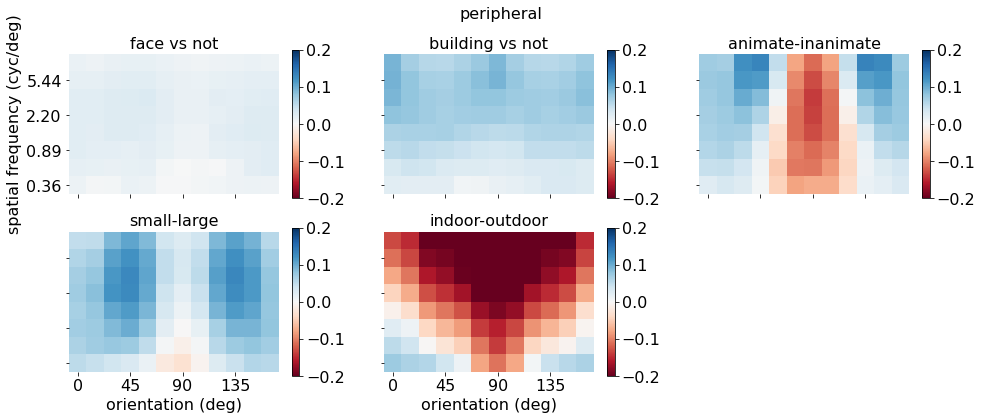

In [49]:
clims = [[-0.2, 0.2] for ai in range(5)];
# clims = [[-0.22, 0.22], [-0.21, 0.21], [-0.07, 0.07]]

for name, prf_inds in zip(prf_names, prf_groups):

    plt.figure(figsize=(16,6));

    for ai, aa in enumerate(partial_signed_names):

        plt.subplot(2,3,ai+1)

        # image = np.mean(partial_corr_reshaped[:,:,:,ai], axis=2)
        image = np.nanmean(partial_corr_reshaped[:,:,prf_inds,ai], axis=2)
        print([np.min(image), np.max(image)])
        plt.pcolormesh(image.T, vmin=clims[ai][0], vmax=clims[ai][1], cmap=cm.RdBu)
        # plt.pcolormesh(image.T)
        plt.colorbar()
        if ai>2:
            plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
            plt.xlabel('orientation (deg)')
        else:
            plt.xticks(np.arange(0,12,3)+0.5,[])
        sf_ticks = sf_unique[[0,2,4,6]].round(2)
        if ai==0:
            plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
            plt.ylabel('spatial frequency (cyc/deg)')
        else:
            plt.yticks(np.array([0,2,4,6])+0.5, [])


        plt.axis('square')
        plt.xlim([0,12])
        plt.ylim([0,8])
        # plt.axis('off')


        plt.title(partial_signed_names[ai])

        plt.box(False)
        
    plt.suptitle(name)

# fn2save = fn2save = os.path.join(default_paths.fig_path,'Gabor_semantic_corrs_2dplots.pdf')
# plt.savefig(fn2save)


In [10]:
fn = '/user_data/mmhender/nsd/labels/Semantic_to_semantic_corrs_grid5.npy'
out = np.load(fn, allow_pickle=True)
out.shape

import pandas as pd
vals = np.mean(out, axis=2)
for ii in range(4):
    vals[ii,ii] = 1
pd.DataFrame(vals, columns=groups['discrim_type_list'], index=groups['discrim_type_list'])

,face-building,animate-inanimate,small-large,indoor-outdoor
face-building,1.000000,0.611556,0.510320,0.526445
animate-inanimate,0.611556,1.000000,-0.206473,-0.386175
small-large,0.510320,-0.206473,1.000000,0.364269
indoor-outdoor,0.526445,-0.386175,0.364269,1.000000


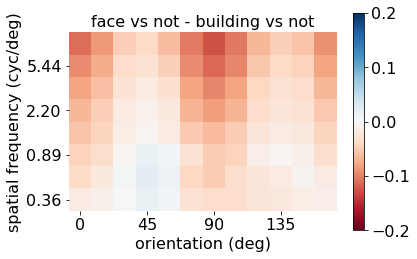

In [11]:
plt.figure()

clims = [-0.2, 0.2]

aa1 = 0; aa2 = 1;
image = np.nanmean(partial_corr_reshaped[:,:,:,aa1], axis=2) - np.nanmean(partial_corr_reshaped[:,:,:,aa2], axis=2)
plt.pcolormesh(image.T, vmin=clims[0], vmax=clims[1], cmap=cm.RdBu)
plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)
plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
plt.ylabel('spatial frequency (cyc/deg)')

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])
plt.xlabel('orientation (deg)')

plt.title('%s - %s'%(partial_signed_names[aa1], partial_signed_names[aa2]))

plt.box(False)

#### Plot mean/variance each feature channel
Averaged across pRFs

0.03920804 0.13662134
0.00013643742 0.0012682579


Text(0.5, 1.0, 'var')

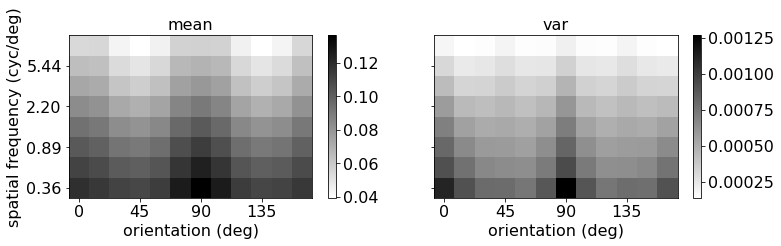

In [21]:
plt.figure(figsize=(12,3));

plt.subplot(1,2,1)

image = np.mean(mean_reshaped, axis=2)
print(np.min(image), np.max(image))
clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, vmin=clims[0], vmax=clims[1], cmap=cm.gray_r)
plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)

plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
plt.ylabel('spatial frequency (cyc/deg)')

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])
plt.xlabel('orientation (deg)')
plt.title('mean')

plt.subplot(1,2,2)

image = np.mean(var_reshaped, axis=2)
print(np.min(image), np.max(image))
clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, vmin=clims[0], vmax=clims[1], cmap=cm.gray_r)

plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)
plt.yticks(np.array([0,2,4,6])+0.5, [])

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])

plt.xlabel('orientation (deg)')

plt.title('var')
    

0.042203274 0.13086486
0.00020776206 0.0014513802
0.036037467 0.14346278
0.00019840992 0.0019043761


Text(0.5, 0.98, 'peripheral - central')

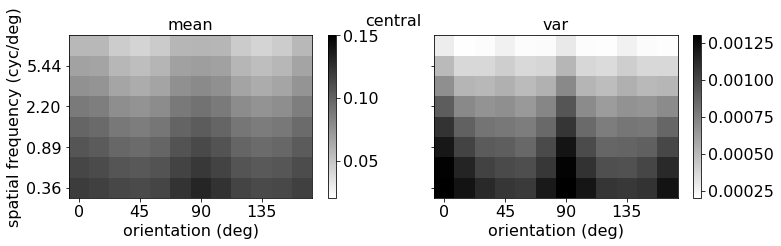

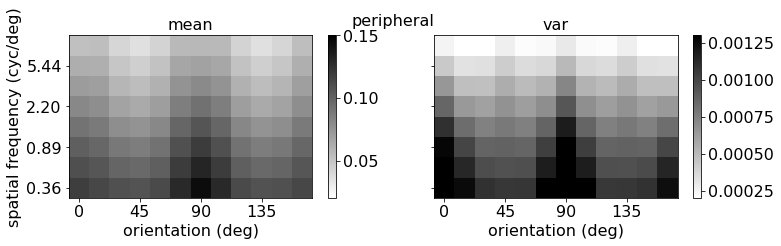

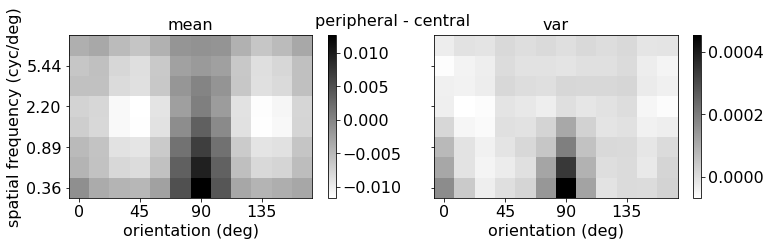

In [57]:
clims_mean = [0.02, 0.15]
clims_var = [0.0002, 0.0013]

for name, prf_inds in zip(prf_names, prf_groups):

    plt.figure(figsize=(12,3));

    plt.subplot(1,2,1)

    image = np.mean(mean_reshaped[:,:,prf_inds], axis=2)
    print(np.min(image), np.max(image))
    # clims = [np.min(image), np.max(image)]
    plt.pcolormesh(image.T, vmin=clims_mean[0], vmax=clims_mean[1], cmap=cm.gray_r)
    plt.colorbar()
    plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
    sf_ticks = sf_unique[[0,2,4,6]].round(2)

    plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
    plt.ylabel('spatial frequency (cyc/deg)')

    plt.axis('square')
    plt.xlim([0,12])
    plt.ylim([0,8])
    plt.xlabel('orientation (deg)')
    plt.title('mean')

    plt.subplot(1,2,2)

    image = np.mean(var_reshaped[:,:,prf_inds], axis=2)
    print(np.min(image), np.max(image))
    # clims = [np.min(image), np.max(image)]
    plt.pcolormesh(image.T, vmin=clims_var[0], vmax=clims_var[1], cmap=cm.gray_r)

    plt.colorbar()
    plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
    sf_ticks = sf_unique[[0,2,4,6]].round(2)
    plt.yticks(np.array([0,2,4,6])+0.5, [])

    plt.axis('square')
    plt.xlim([0,12])
    plt.ylim([0,8])

    plt.xlabel('orientation (deg)')

    plt.title('var')
    
    plt.suptitle(name)

plt.figure(figsize=(12,3));

plt.subplot(1,2,1)

image1 = np.mean(mean_reshaped[:,:,prf_groups[1]], axis=2)
image2 = np.mean(mean_reshaped[:,:,prf_groups[0]], axis=2)
image = image1 - image2

# print(np.min(image), np.max(image))
# clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, \
               # vmin=clims_mean[0], vmax=clims_mean[1], \
               cmap=cm.gray_r)
plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)

plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
plt.ylabel('spatial frequency (cyc/deg)')

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])
plt.xlabel('orientation (deg)')
plt.title('mean')

plt.subplot(1,2,2)

image1 = np.mean(var_reshaped[:,:,prf_groups[1]], axis=2)
image2 = np.mean(var_reshaped[:,:,prf_groups[0]], axis=2)
image = image1 - image2

# print(np.min(image), np.max(image))
# clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, \
               # vmin=clims_var[0], vmax=clims_var[1], \
               cmap=cm.gray_r)

plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)
plt.yticks(np.array([0,2,4,6])+0.5, [])

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])

plt.xlabel('orientation (deg)')

plt.title('var')

plt.suptitle('%s - %s'%(prf_names[1], prf_names[0]))

In [60]:
pix_per_cycle=4.13; cycles_per_radius=0.7;

pix_per_radius = pix_per_cycle * cycles_per_radius

pix_per_radius

radii_per_filter=4

pix_per_filter = pix_per_radius * radii_per_filter

pix_per_filter

11.563999999999998

(12, 8, 1456)

0.040441565 0.13385558
0.00030282303 0.0017248814
0.04045053 0.13386168
0.00024384898 0.0016900786
0.0404021 0.13393652
0.00019470642 0.0016043549
0.040239327 0.13414073
0.00015439888 0.0014736342
0.039603617 0.13562132
0.00012526877 0.0013334161
0.039051633 0.13663197
9.9858786e-05 0.0011302199
0.038494755 0.13805766
8.4037725e-05 0.0010168944
0.038221695 0.13890007
7.4695134e-05 0.00097612693
0.038054742 0.13946149
7.0914844e-05 0.000979407
0.037953153 0.13981225
6.990626e-05 0.0009919286


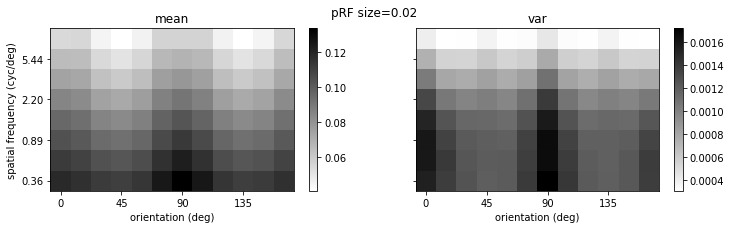

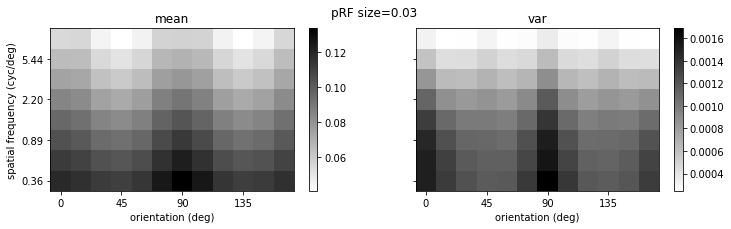

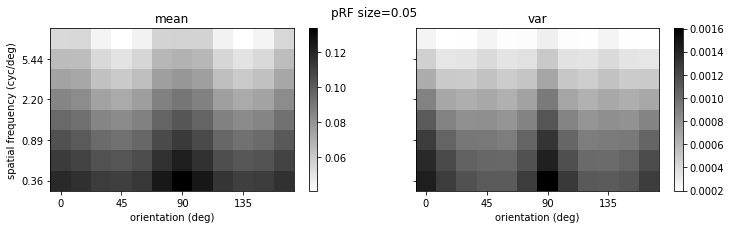

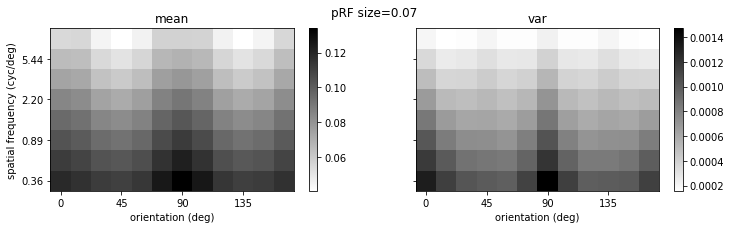

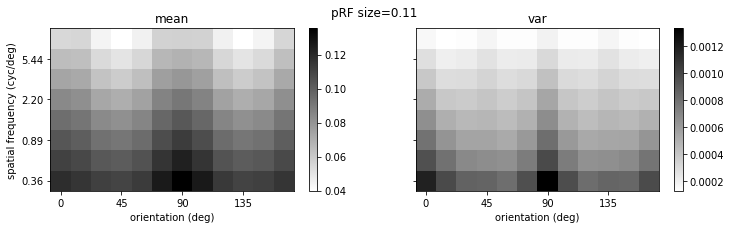

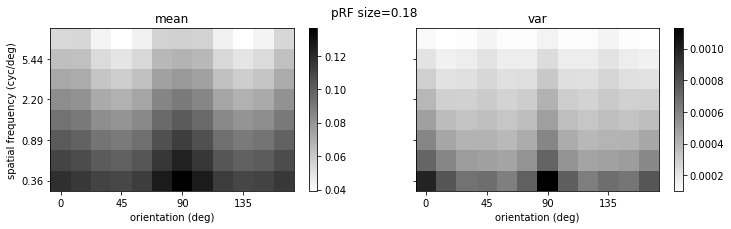

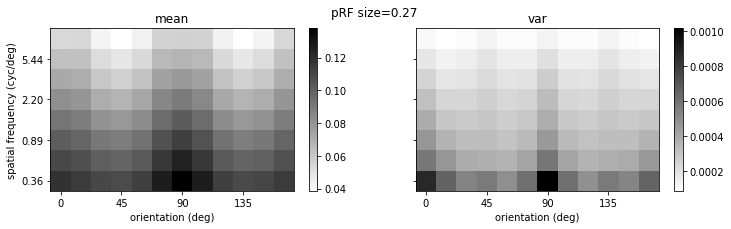

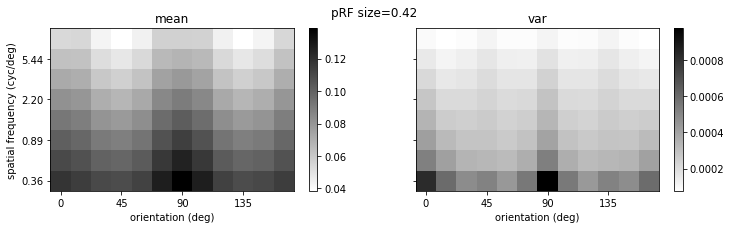

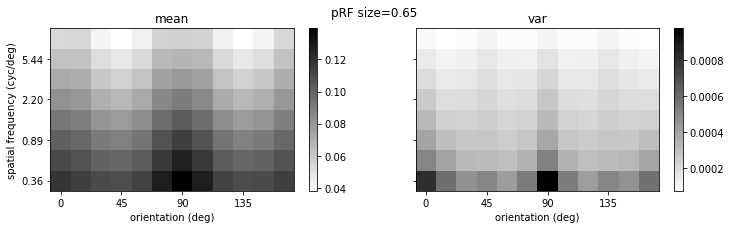

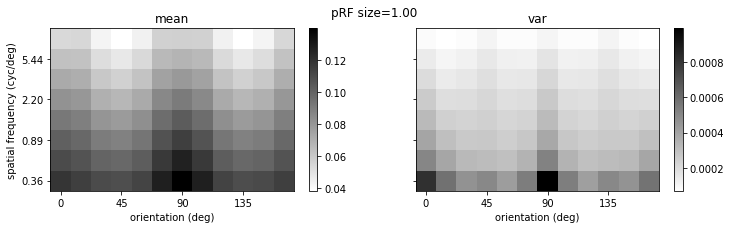

In [8]:
for size in np.unique(models[:,2].round(2)):

    
    prf_inds = models[:,2].round(2)==size
    
    plt.figure(figsize=(12,3));

    plt.subplot(1,2,1)

    image = np.mean(mean_reshaped[:,:,prf_inds], axis=2)
    
    print(np.min(image), np.max(image))
    clims = [np.min(image), np.max(image)]
    
    plt.pcolormesh(image.T, vmin=clims[0], vmax=clims[1], cmap=cm.gray_r)
    plt.colorbar()
    plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
    sf_ticks = sf_unique[[0,2,4,6]].round(2)

    plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
    plt.ylabel('spatial frequency (cyc/deg)')

    plt.axis('square')
    plt.xlim([0,12])
    plt.ylim([0,8])
    plt.xlabel('orientation (deg)')
    plt.title('mean')

    plt.subplot(1,2,2)

    image = np.mean(var_reshaped[:,:,prf_inds], axis=2)
    print(np.min(image), np.max(image))
    clims = [np.min(image), np.max(image)]
    plt.pcolormesh(image.T, vmin=clims[0], vmax=clims[1], cmap=cm.gray_r)

    plt.colorbar()
    plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
    sf_ticks = sf_unique[[0,2,4,6]].round(2)
    plt.yticks(np.array([0,2,4,6])+0.5, [])

    plt.axis('square')
    plt.xlim([0,12])
    plt.ylim([0,8])

    plt.xlabel('orientation (deg)')

    plt.title('var')
    
    plt.suptitle('pRF size=%.2f'%size)
    
    

In [26]:
for ai, aa in enumerate(axes_to_do_partial):
    
    image1 = np.mean(partial_corr_reshaped[:,:,:,ai], axis=2)
    
    image2 = np.mean(mean_reshaped, axis=2)
    
    print('%s vs mean:'%(partial_signed_names[ai]))
    print('   %.3f'%np.corrcoef(image1.ravel(), image2.ravel())[0,1])
    
    image2 = np.mean(var_reshaped, axis=2)
    
    print('%s vs var:'%(partial_signed_names[ai]))
    print('   %.3f'%np.corrcoef(image1.ravel(), image2.ravel())[0,1])

outdoor > indoor vs mean:
   -0.740
outdoor > indoor vs var:
   -0.765
animate > inanimate vs mean:
   -0.447
animate > inanimate vs var:
   -0.292
large > small vs mean:
   0.091
large > small vs var:
   -0.056


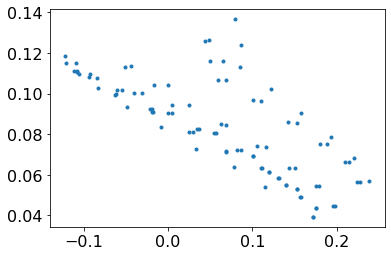

In [28]:
plt.figure();
ai=0;
image1 = np.mean(partial_corr_reshaped[:,:,:,ai], axis=2)
image2 = np.mean(mean_reshaped, axis=2)
    
plt.plot(image1.ravel(), image2.ravel(),'.')

In [24]:
models.round(2)
sizes = np.unique(models[:,2].round(2))
size_ind = 3;
inds = np.where(models[:,2].round(2)==sizes[size_ind])[0]
len(inds)
leftmost_prf = inds[np.argmin(models[inds,0])]
rightmost_prf = inds[np.argmax(models[inds,0])]
topmost_prf = inds[np.argmax(models[inds,1])]
bottommost_prf = inds[np.argmin(models[inds,1])]
centermost_prf = inds[np.argmin(models[inds,0]**2+models[inds,1]**2)]
# leftmost_prf
prf_names = ['left','right','top','bottom','center']
prf_inds_plot = [leftmost_prf, rightmost_prf, topmost_prf, bottommost_prf, centermost_prf]

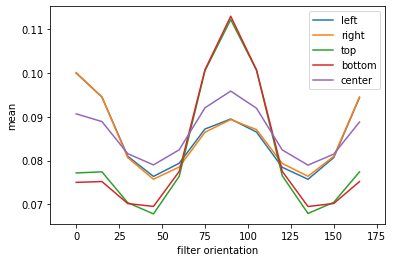

In [25]:
plt.figure()

for name, ind in zip(prf_names, prf_inds_plot):
    plt.plot(ori_unique, np.mean(mean_reshaped[:,:,ind],axis=1))
    plt.xlabel('filter orientation');
    plt.ylabel('mean');
    plt.xlim([-15, 180])
    # for ii in np.arange(0,180,45):
        # plt.axvline(ii, color=[0.8, 0.8, 0.8])
plt.legend(prf_names)

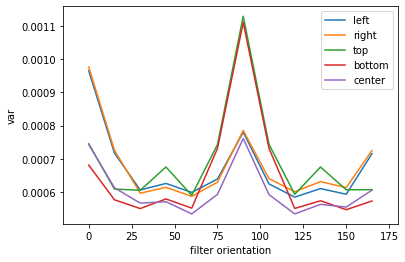

In [26]:
plt.figure()

for name, ind in zip(prf_names, prf_inds_plot):
    plt.plot(ori_unique, np.mean(var_reshaped[:,:,ind],axis=1))
    plt.xlabel('filter orientation');
    plt.ylabel('var');
    plt.xlim([-15, 180])
    # for ii in np.arange(0,180,45):
        # plt.axvline(ii, color=[0.8, 0.8, 0.8])
plt.legend(prf_names)

In [19]:
mean_reshaped.shape

(12, 8, 1456)

In [15]:
models[leftmost_prf,:].round(2)

array([-0.47, -0.  ,  0.07], dtype=float32)

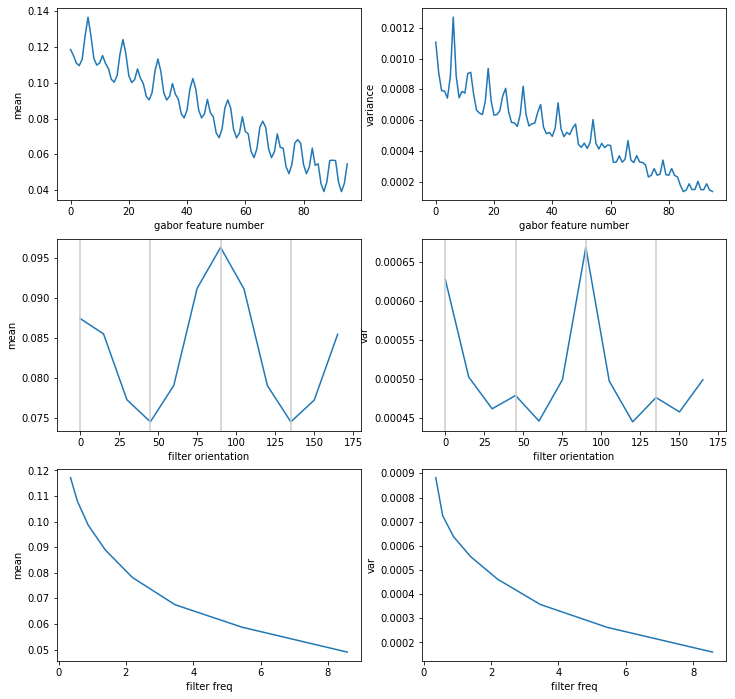

In [7]:
plt.figure(figsize=(12,12));

plt.subplot(3,2,1)
plt.plot(np.mean(mean, axis=1)[0:150])
plt.xlabel('gabor feature number');
plt.ylabel('mean');
plt.subplot(3,2,2)
plt.plot(np.mean(var, axis=1)[0:150])
plt.xlabel('gabor feature number');
plt.ylabel('variance');
     
plt.subplot(3,2,3)
plt.plot(ori_unique, np.mean(np.mean(mean_reshaped, axis=2), axis=1))
plt.xlabel('filter orientation');
plt.ylabel('mean');
plt.xlim([-15, 180])
for ii in np.arange(0,180,45):
    plt.axvline(ii, color=[0.8, 0.8, 0.8])

plt.subplot(3,2,4)
plt.plot(ori_unique, np.mean(np.mean(var_reshaped, axis=2), axis=1))
plt.xlabel('filter orientation');
plt.ylabel('var');
plt.xlim([-15, 180])
for ii in np.arange(0,180,45):
    plt.axvline(ii, color=[0.8, 0.8, 0.8])
    
plt.subplot(3,2,5)
plt.plot(sf_unique, np.mean(np.mean(mean_reshaped, axis=2), axis=0))
plt.xlabel('filter freq');
plt.ylabel('mean');

plt.subplot(3,2,6)
plt.plot(sf_unique, np.mean(np.mean(var_reshaped, axis=2), axis=0))
plt.xlabel('filter freq');
plt.ylabel('var');